In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [66]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df.isnull().sum() # no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

classification - check if classes are balanced or imbalanced

`pip install imblearn` to handle class - imbalance


<Axes: ylabel='count'>

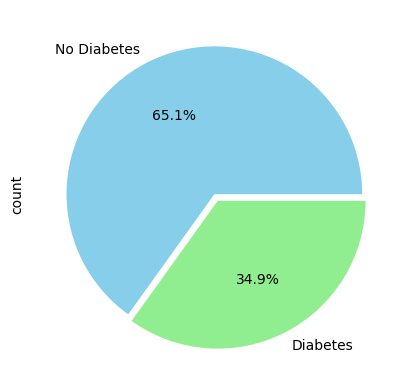

In [68]:
df.Outcome.value_counts().plot(kind='pie', autopct='%.1f%%', 
    labels=['No Diabetes', 'Diabetes'],
    colors=['skyblue', 'lightgreen'], explode=[0, 0.05])

importing libraries

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [70]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("training data =>",X_train.shape, X_test.shape)


training data => (614, 8) (154, 8)


In [71]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
model

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [72]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

grid search cv - to find best parameters for the model

In [73]:
list(range(5, 100, 10)) # just to see the range

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [74]:
# `dt` is the name of the decision tree classifier in the pipeline
params = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': list(range(5, 100, 10))
}

grid = GridSearchCV(model, param_grid=params, cv=5, verbose=1)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

fitting the model

In [75]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

best parameters

In [76]:
grid.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 95}

all the metrics as a dataframe

In [77]:
result_df = pd.DataFrame( grid.cv_results_ )
result_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.004687,0.000269,0.001288,0.000378,log_loss,45,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.674797,0.739837,0.666667,0.666667,0.770492,0.703692,0.043233,1
9,0.004551,0.000406,0.001704,0.000602,gini,95,"{'dt__criterion': 'gini', 'dt__max_depth': 95}",0.699187,0.707317,0.650407,0.691057,0.770492,0.703692,0.038716,1
14,0.004707,0.000684,0.001201,0.000399,entropy,45,"{'dt__criterion': 'entropy', 'dt__max_depth': 45}",0.674797,0.731707,0.658537,0.650407,0.786885,0.700466,0.051705,3
21,0.005030,0.000327,0.001402,0.000490,log_loss,15,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.666667,0.723577,0.666667,0.658537,0.786885,0.700466,0.049082,3
16,0.005117,0.000806,0.001302,0.000875,entropy,65,"{'dt__criterion': 'entropy', 'dt__max_depth': 65}",0.666667,0.747967,0.666667,0.634146,0.786885,0.700466,0.057285,3
12,0.006208,0.000818,0.002610,0.000485,entropy,25,"{'dt__criterion': 'entropy', 'dt__max_depth': 25}",0.666667,0.715447,0.682927,0.666667,0.770492,0.700440,0.039295,6
27,0.005509,0.000554,0.001203,0.000399,log_loss,75,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.634146,0.723577,0.674797,0.650407,0.803279,0.697241,0.061018,7
26,0.004603,0.000373,0.001303,0.000605,log_loss,65,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.658537,0.699187,0.674797,0.674797,0.778689,0.697201,0.042762,8
0,0.004607,0.000585,0.001802,0.000401,gini,5,"{'dt__criterion': 'gini', 'dt__max_depth': 5}",0.691057,0.715447,0.626016,0.691057,0.762295,0.697174,0.044075,9
3,0.004827,0.000521,0.002000,0.000002,gini,35,"{'dt__criterion': 'gini', 'dt__max_depth': 35}",0.715447,0.691057,0.666667,0.666667,0.745902,0.697148,0.030355,10


extract the best model

In [78]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=95))])

check the confusion matrix

In [79]:
y_pred = best_model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf

array([[72, 23],
       [23, 36]], dtype=int64)

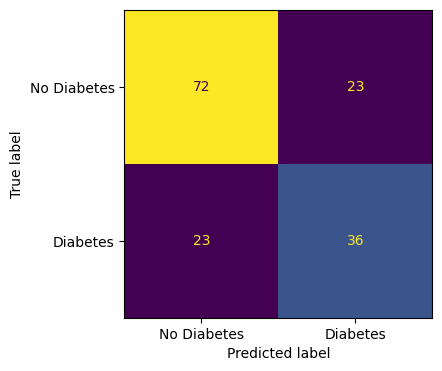

In [80]:
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(cf, display_labels=['No Diabetes', 'Diabetes']).plot(ax=ax, colorbar=False)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        95
           1       0.61      0.61      0.61        59

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154



plottling grid search results

<Axes: >

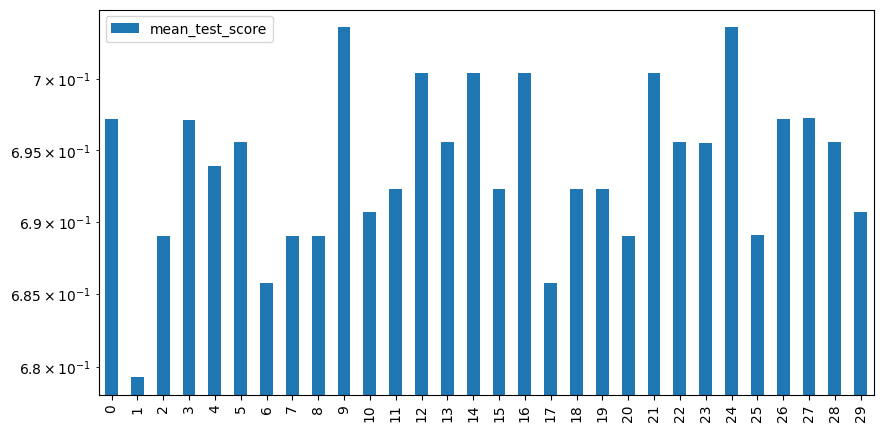

In [82]:
result_df[['mean_test_score']].plot(kind='bar', logy=True, figsize=(10, 5))

In [83]:
import joblib

joblib.dump(best_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

#### task for you => make a gradio app for this model

Understand undersampling 

In [84]:
!pip install imblearn

In [85]:
from imblearn.under_sampling import RandomUnderSampler

before undersample
Outcome
0    405
1    209
Name: count, dtype: int64
after undersample
Outcome
0    209
1    209
Name: count, dtype: int64


<Axes: ylabel='count'>

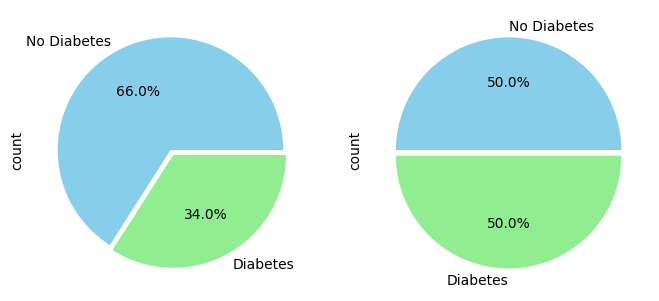

In [86]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
rus = RandomUnderSampler()
print("before undersample")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', 
    autopct='%.1f%%', 
    labels=['No Diabetes', 'Diabetes'],
    colors=['skyblue', 'lightgreen'], 
    explode=[0, 0.05],
    ax=ax1)

X_train, y_train = rus.fit_resample(X_train, y_train)
print("after undersample")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', 
    autopct='%.1f%%', 
    labels=['No Diabetes', 'Diabetes'],
    colors=['skyblue', 'lightgreen'], 
    explode=[0, 0.05],
    ax=ax2)